In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tim2dai","key":"b7f3915dd9459a3ac01eec0e475bdbf1"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 27.1MB/s]
 97% 262M/271M [00:02<00:00, 105MB/s] 
100% 271M/271M [00:03<00:00, 93.4MB/s]
 97% 525M/543M [00:03<00:00, 159MB/s]
100% 543M/543M [00:04<00:00, 141MB/s]


In [ ]:
!unzip -qq train.zip

In [ ]:
!mkdir ../content/cats_vs_dogs_small

In [ ]:
import os, shutil
from pathlib import Path

ORIGIN = Path('../content/train')
NEW = Path('../content/cats_vs_dogs_small')

def make_subnet(SUB, start, end):
    for category in ("cat", "dog"):
        DIR = NEW / SUB / category
        os.makedirs(DIR)
        fnames = [f"{category}.{i}.jpg" for i in range(start, end)]
        for fname in fnames:
            shutil.copyfile(src = ORIGIN / fname,
                            dst = DIR / fname)

In [ ]:
make_subnet("train", 0, 1000)
make_subnet("validation", 1000, 1500)
make_subnet("test", 1500, 2500)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856 

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    NEW / "train",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    NEW / "test",
    image_size=(180, 180),
    batch_size=32)
val_dataset = image_dataset_from_directory(
    NEW / "validation",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="naiveCV.keras",
#         save_best_only=True,
#         monitor="val_loss"
#     )
# ]

In [ ]:
# history = model.fit(
#     train_dataset,
#     epochs=30,
#     callbacks=callbacks,
#     validation_data=val_dataset
# )

In [ ]:
# # plotting loss & accuracy
import matplotlib.pyplot as plt
# plt.style.use('seaborn-pastel')

# loss = history.history["loss"] 
# val_loss = history.history["val_loss"] 
# acc = history.history["accuracy"] 
# val_acc = history.history["val_accuracy"] 
# epochs = range(1, len(loss) + 1) 

# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

# ax1.plot(epochs, loss, "bo", label="Train loss", alpha=0.5) 
# ax1.plot(epochs, val_loss, "b", label="Val loss", alpha=0.5) 
# ax1.tick_params(axis='y', labelcolor='tab:blue')
# ax1.set_xlabel("Epochs") 
# ax1.set_ylabel("Loss") 

# ax2.set_ylabel("Accuracy")
# ax2.set_ylim(top=1.0)
# ax2.plot(epochs, acc, "go", label="Train acc", alpha=0.5) 
# ax2.plot(epochs, val_acc, "g", label="Val acc", alpha=0.5) 
# ax2.tick_params(axis='y', labelcolor='tab:green')

# fig.tight_layout()
# # fig.legend(loc='upper left')
# plt.show()


In [ ]:
# test_model = keras.models.load_model("naiveCV.keras")
# test_loss, test_acc = test_model.evaluate(test_dataset)
# print("Test loss: {}\n accuracy: {:.4f}".format(test_loss, test_acc))

In [ ]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2)
])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


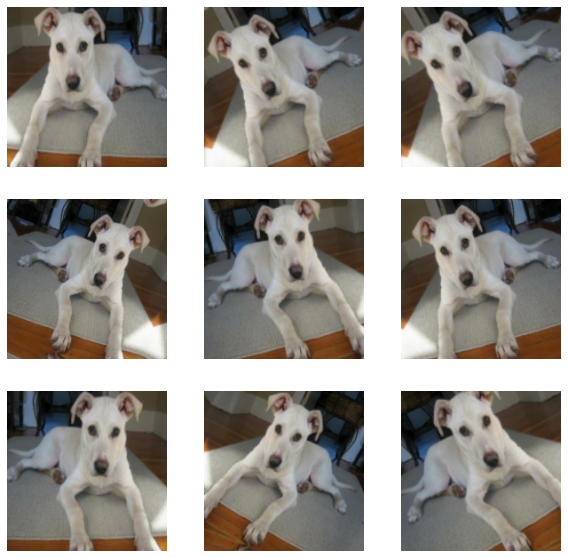

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(42):
    for i in range(9):
        augmented_images = data_aug(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_aug(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
new_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
new_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
new_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="naiveCVwithDataAug.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [ ]:
history = new_model.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
    callbacks=new_callbacks
)

Epoch 1/100
63/63 [==============================] - 7s 91ms/step - loss: 0.7358 - accuracy: 0.5140 - val_loss: 0.6904 - val_accuracy: 0.5110
Epoch 2/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6947 - accuracy: 0.5305 - val_loss: 0.6885 - val_accuracy: 0.5010
Epoch 3/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6940 - accuracy: 0.5635 - val_loss: 0.6751 - val_accuracy: 0.5650
Epoch 4/100
63/63 [==============================] - 6s 89ms/step - loss: 0.6800 - accuracy: 0.6185 - val_loss: 0.6526 - val_accuracy: 0.5980
Epoch 5/100
63/63 [==============================] - 6s 90ms/step - loss: 0.6326 - accuracy: 0.6505 - val_loss: 0.6401 - val_accuracy: 0.6270
Epoch 6/100
63/63 [==============================] - 6s 89ms/step - loss: 0.6250 - accuracy: 0.6535 - val_loss: 0.6212 - val_accuracy: 0.6440
Epoch 7/100
63/63 [==============================] - 6s 88ms/step - loss: 0.6166 - accuracy: 0.6635 - val_loss: 0.6698 - val_accuracy: 0.6070
Epoch 

In [ ]:
test_model = keras.models.load_model("naiveCVwithDataAug.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print("Test loss: {}\n accuracy: {:.4f}".format(test_loss, test_acc))

63/63 [==============================] - 4s 52ms/step - loss: 0.4861 - accuracy: 0.8090
Test loss: 0.4861188530921936
 accuracy: 0.8090


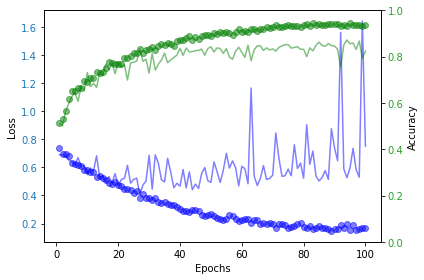

In [ ]:
plt.style.use('seaborn-pastel')

loss = history.history["loss"] 
val_loss = history.history["val_loss"] 
acc = history.history["accuracy"] 
val_acc = history.history["val_accuracy"] 
epochs = range(1, len(loss) + 1) 

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(epochs, loss, "bo", label="Train loss", alpha=0.5) 
ax1.plot(epochs, val_loss, "b", label="Val loss", alpha=0.5) 
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel("Epochs") 
ax1.set_ylabel("Loss") 

ax2.set_ylabel("Accuracy")
ax2.set_ylim(top=1.0)
ax2.plot(epochs, acc, "go", label="Train acc", alpha=0.5) 
ax2.plot(epochs, val_acc, "g", label="Val acc", alpha=0.5) 
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
# fig.legend(loc='upper left')
plt.show()
